### 获取数据

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.externals import joblib

In [3]:
data = pd.read_csv('/Users/lujiawen/Desktop/第八组/test_V2.csv')
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.0,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,...,1503,2,4669.0,0,0.0,0,0,2017.0,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,...,1565,0,0.0,0,0.0,0,0,787.8,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,...,1465,0,0.0,0,0.0,0,0,1812.0,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,...,1480,1,0.0,0,0.0,0,0,2963.0,4,0


In [4]:
data.shape

(1934174, 28)

### 数据处理

#### 异常值

##### 缺失值---判断有无缺失值

In [7]:
np.any(pd.isnull(data))

False

#### 缩小数据范围

##### 小组

In [11]:
group_count = data.groupby('matchId').count()
group_count = group_count[(group_count['Id']>70)] 
group_count
data_true_ = data[data["matchId"].isin(group_count.index)]
data_true_
data_true_.shape

(1922404, 28)

##### 切片

In [9]:
# data_ = data_true_[::20]
# data_.shape

(96121, 28)

In [10]:
# data_.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.00,1,0
20,8a706bc525a3cb,22d1e4cd6d6a62,08f83a93dbd231,0,1,25.80,0,0,0,44,...,1547,0,7481.0,0,0.0,0,0,2168.00,1,0
40,51e0ba397b24d5,5cc05cfe8feb6d,d6c2929b422854,4,4,208.50,0,0,8,44,...,-1,0,268.9,0,0.0,0,0,3368.00,6,1477
60,800e92d02a2da3,d0a828bd6d26cf,c71033ff38ec90,0,0,25.74,0,0,0,55,...,1510,0,0.0,0,0.0,0,0,154.90,4,0
80,109659fc9d360b,4baf81131e479f,a9f0813690de2d,0,0,47.75,0,0,0,92,...,-1,0,0.0,0,0.0,0,0,84.52,2,1453


##### 可视化分析开挂数据并剔除

In [24]:
waigua = 'kills'
data_true_.sort_values(by= waigua,ascending=False)[waigua].head()

765679     46
654579     40
646550     36
1315868    34
626100     33
Name: kills, dtype: int64

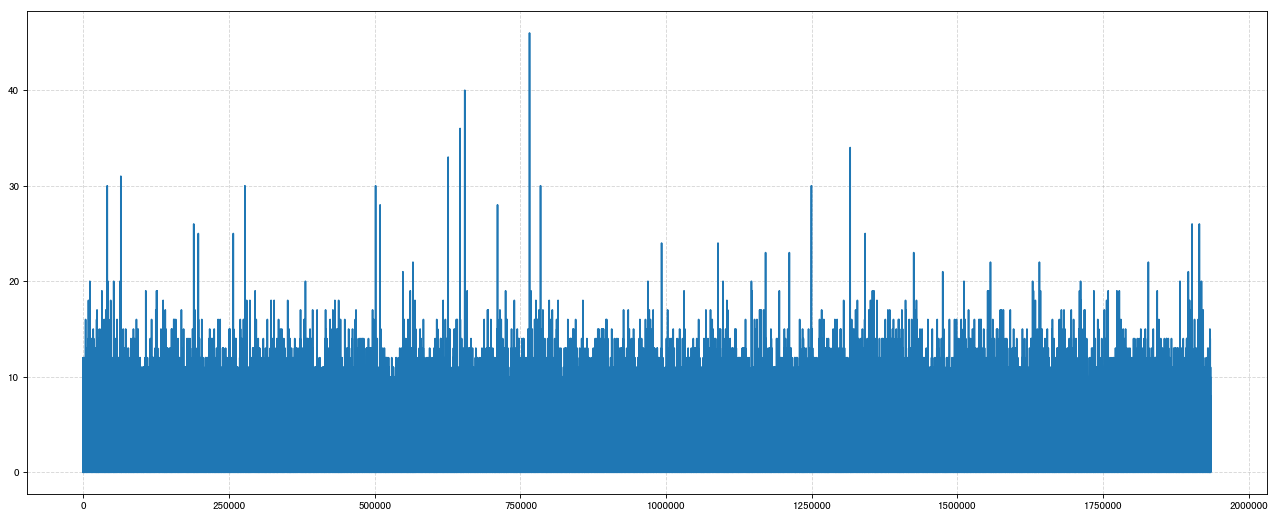

In [15]:
plt.figure(figsize=(20, 8), dpi=80)
x= data_true_.index
y= data_true_[waigua]
plt.scatter(x,y)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [25]:
# 去掉击杀数大于20的玩家
data_true = data_true_[(data_true_[waigua]<20)] 
data_true
data_true.shape

(1922360, 28)

##### 文本数据替换

In [26]:
data_true.loc[data_true['matchType']=='solo','matchType'] = 1
data_true.loc[data_true['matchType']=='duo','matchType'] = 2
data_true.loc[data_true['matchType']=='squad','matchType'] = 3
data_true.loc[data_true['matchType']=='solo-fpp','matchType'] = 4
data_true.loc[data_true['matchType']=='duo-fpp','matchType'] = 5
data_true.loc[data_true['matchType']=='squad-fpp','matchType'] = 6

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [17]:
data_true.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,...,1500,0,0.0,0,0.0,0,0,588.00,1,0
20,8a706bc525a3cb,22d1e4cd6d6a62,08f83a93dbd231,0,1,25.80,0,0,0,44,...,1547,0,7481.0,0,0.0,0,0,2168.00,1,0
40,51e0ba397b24d5,5cc05cfe8feb6d,d6c2929b422854,4,4,208.50,0,0,8,44,...,-1,0,268.9,0,0.0,0,0,3368.00,6,1477
60,800e92d02a2da3,d0a828bd6d26cf,c71033ff38ec90,0,0,25.74,0,0,0,55,...,1510,0,0.0,0,0.0,0,0,154.90,4,0
80,109659fc9d360b,4baf81131e479f,a9f0813690de2d,0,0,47.75,0,0,0,92,...,-1,0,0.0,0,0.0,0,0,84.52,2,1453


##### 比赛类型

In [27]:
match_type = data_true.groupby('matchType').count()
m = match_type.iloc[0:6,]
m

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
matchType,,,,,,,,,,,,,,,,,,,,,
1,76415,76415,76415,76415,76415,76415,76415,76415,76415,76415,...,76415,76415,76415,76415,76415,76415,76415,76415,76415,76415
2,140317,140317,140317,140317,140317,140317,140317,140317,140317,140317,...,140317,140317,140317,140317,140317,140317,140317,140317,140317,140317
3,275222,275222,275222,275222,275222,275222,275222,275222,275222,275222,...,275222,275222,275222,275222,275222,275222,275222,275222,275222,275222
4,235252,235252,235252,235252,235252,235252,235252,235252,235252,235252,...,235252,235252,235252,235252,235252,235252,235252,235252,235252,235252
5,440660,440660,440660,440660,440660,440660,440660,440660,440660,440660,...,440660,440660,440660,440660,440660,440660,440660,440660,440660,440660
6,750204,750204,750204,750204,750204,750204,750204,750204,750204,750204,...,750204,750204,750204,750204,750204,750204,750204,750204,750204,750204


In [19]:
m.shape

(6, 27)

In [28]:
data_new = data_true[data_true["matchType"].isin(m.index)]

In [29]:
data_new.head()
data_new["matchType"].head()
# data_new.shape

0    6
1    5
2    6
3    5
4    6
Name: matchType, dtype: object

#### 删除id列

In [35]:
data_new= data_new.drop(['Id','groupId','matchId'],axis=1)
data_new.head()

### 特征工程

#### 特征提取--

#### 特征预处理---标准化

In [36]:
#  实例化一个转换器
transfer = StandardScaler()
#  调用fit_transform
x = transfer.fit_transform(data_new)

#### 特征降维

In [141]:
# transfer = VarianceThreshold(threshold=1)
# # 2、调用fit_transform
# dataa = transfer.fit_transform(x_train.iloc[:,:])
# print("删除低方差特征的结果：\n", dataa)
# # print("形状：\n", data.shape)


In [203]:
# transfer = PCA(n_components=0.9)
# # 2、调用fit_transform
# data1 = transfer.fit_transform(x_train)

### 模型加载

In [37]:
estimator = joblib.load("/Users/lujiawen/Desktop/第八组/绝地求生.pkl")
estimator

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### 评估

In [39]:
from sklearn.metrics import mean_absolute_error
y_predict = estimator.predict(x)
print("预测值为:\n", y_predict)
print("模型中的系数为:\n", estimator.coef_)
print("模型中的偏置为:\n", estimator.intercept_)

# 5.2 评价
# 均方误差
# error = mean_squared_error(y_test, y_predict)
# print("误差为:\n", error)
#mae 平均绝对误差
# error = mean_absolute_error(y_test, y_predict)
# print("误差为:\n", error)

预测值为:
 [0.19619158 0.90825743 0.46449792 ... 0.8007859  0.73951227 0.02644521]
模型中的系数为:
 [ 0.00797669  0.02459968  0.01190086 -0.00604572 -0.000881    0.00125277
 -0.20583267 -0.03013976 -0.02665849 -0.10409871  0.00107767 -0.04004264
  0.00483766 -0.07679339  0.10214278  0.08545307  0.0063619   0.02593539
 -0.00040227  0.0031659  -0.00333369  0.0009972   0.13115392  0.02684958
  0.11475043]
模型中的偏置为:
 0.47176095104282617


NameError: name 'y_test' is not defined